# The Sparks Foundation

# SHRADDHA RATRA
# Batch:  November 2022

# Task 1: Prediction Using Supervised ML






# Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
import seaborn as sns

In [2]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(url)

# Prediction Problem
    # Problem Statement: Predict the percentage of a student based on the number of study hours
    # Data: 
        Dependent variable - Percents]age Score
        Independent variable - Number of Study Hours
    # Modelling: Simple Linear Regression Model
    # Evaluation of the Model

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Data Exploration

In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


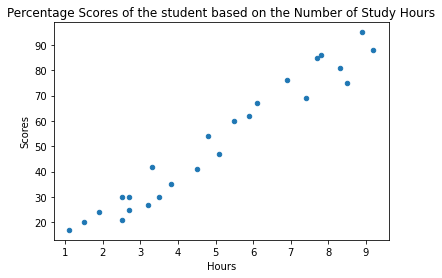

In [5]:
data.plot(kind = "scatter", x = "Hours", y = "Scores" , title = "Percentage Scores of the student based on the Number of Study Hours");

A positove Linear Relationship between number of hours of study and the scores gained by the students

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


#No missing values, can proceed for evaluation

# Modelling

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [8]:
X = data.drop("Scores", axis = 1)
y = data["Scores"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
np.random.seed(42)

In [10]:
reg = LinearRegression()

In [11]:
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.964449965742071

# Predicting y values

In [12]:
y_preds = reg.predict(X_test)
y_preds

array([12.41628071, 84.30425697, 28.39138655, 26.39449832, 36.37893947])

In [13]:
hours = 9.25
h = np.array(hours).reshape(-1, 1)
predicted_score = reg.predict(h)
print("When number of shours studied is 9.25 the score is", predicted_score)

When number of shours studied is 9.25 the score is [93.78947606]


In [14]:
df_preds = pd.DataFrame()
df_preds["Actual Values"] = y_test
df_preds["Predicted Values"] = y_preds
df_preds

,Actual Values,Predicted Values
14,17,12.416281
8,81,84.304257
20,30,28.391387
16,30,26.394498
4,30,36.378939


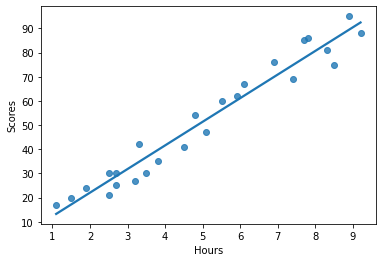

In [15]:
sns.regplot(X, y, ci=None, label = "Fitted Linear Regression line for the Model");

# Evaluting the Model

In [16]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [18]:
np.random.seed(42)
print("Mean Absolute Error", mean_absolute_error(y_test, y_preds))
print("Mean Squared Error", mean_squared_error(y_test, y_preds))
print("Coefficient of Determination", r2_score(y_test, y_preds))

Mean Absolute Error 3.8962061728841846
Mean Squared Error 17.641349000154687
Coefficient of Determination 0.964449965742071


Coefficient of Determination is 0.9644 that indicates that the model fits the data quite accurately